In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
df=pd.read_csv('/content/Student_Performance (1).csv')

In [7]:
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [8]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [10]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [11]:
df.fillna(method='ffill', inplace=True)

<ipython-input-11-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
df = pd.get_dummies(df, drop_first=True)


In [17]:
performance_cols = [col for col in df.columns if 'Performance' in col]
X = df.drop(columns=performance_cols, axis=1)
y = df[performance_cols[0]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [22]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [23]:
print(f"R² Score : {r2:.2f}")
print(f"RMSE     : {rmse:.2f}")


R² Score : 0.99
RMSE     : 2.02


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [25]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("Decision Tree R²:", r2_score(y_test, tree.predict(X_test)))


Decision Tree R²: 0.9764802870400344


In [26]:
svr = SVR()
svr.fit(X_train, y_train)
print("SVR R²:", r2_score(y_test, svr.predict(X_test)))


SVR R²: 0.9854639196313424


In [27]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

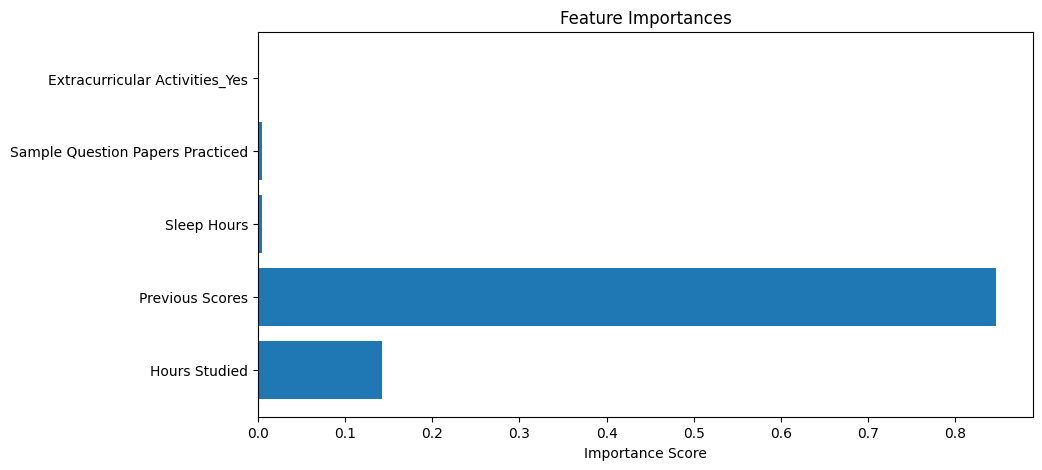

In [29]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()